# Test Calibrating the amplitude of CWT

In [33]:
# Import
from matplotlib.pyplot import subplots
from pandas import Timestamp
from numpy import cos, geomspace, linspace, pi, amax
from obspy import Stream, Trace

from utils_basic import get_unique_stations
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import get_stream_cwt
from utils_plot import plot_cwt_powers,  plot_cwt_cross_spectra 

In [34]:
# Inputs
## Synthetic data
freq1 = 50.0
freq2 = 70.0
freq3 = 90.0

dur = 60.0
sampling_rate = 1000.0

## Wavelet transform
wavelet = "cmor"
bandwidth = 40.0
center_freq = 2.0
scales = geomspace(20, 80, 50)

noise_window = (90, 100.0)

## Plotting
cohe_threshold = 0.8
amp_threshold = 50
freqlim_plot = (40.0, 100.0)

In [35]:
# Generate the synthetic data
timeax = linspace(0, dur, int(dur * sampling_rate) + 1)
signal = cos(2 * pi * freq1 * timeax) + cos(2 * pi * freq2 * timeax) + cos(2 * pi * freq3 * timeax)

trace = Trace(data=signal, header={"starttime": Timestamp.now(), "sampling_rate": sampling_rate})
stream = Stream(traces=[trace])

In [36]:
# Compute the CWT
specs = get_stream_cwt(stream, wavelet=wavelet, scales=scales, bandwidth=bandwidth, center_freq=center_freq)

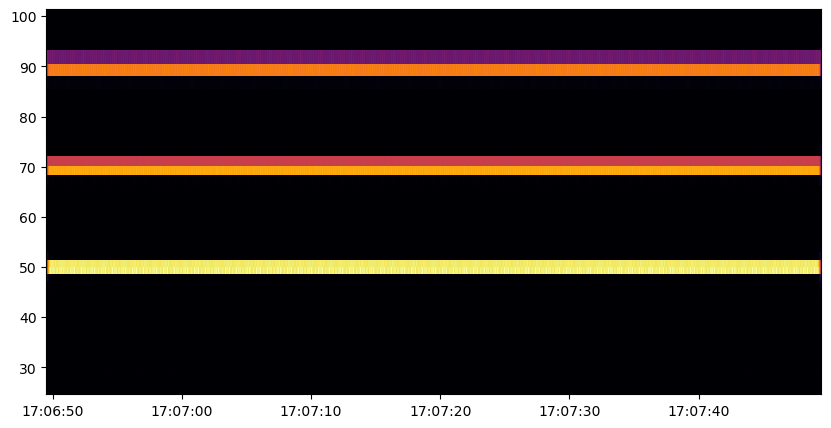

In [37]:
# Plot the amplitude spectrum
spec= specs[0]
freqs = spec.freqs
timeax = spec.times
power = spec.get_power()

fig, ax = subplots(1, 1, figsize=(10, 5))

ax.pcolormesh(timeax, freqs, power, cmap="inferno", shading="auto")

In [38]:
amax(power)

5.740476350517479